# Opis Danych

In [ ]:
UTC: Timestamp UTC seconds

Temperature[C]: Temperature of surroundings, measured in celciusAir Humidity

Humidity[%]: Air humidity during the experiment

TVOC: Total Volatile Organic Compounds; measured in parts per billion

eCO2: co2 equivalent concentration; calculated from different values like TVCO

Raw H2: raw molecular hydrogen; not compensated (Bias, temperature, etc.)

Raw Ethanol: raw ethanol gas

Pressure[hPa]: Air pressure, Measured in hPa

PM1.0: Paticulate matter of diameter less than 1.0 micrometer

PM2.5: Paticulate matter of diameter less than 2.5 micrometer

NC0.5: Concentration of particulate matter of diameter less than 0.5 micrometer

NC1.0: Concentration of particulate matter of diameter less than 1.0 micrometer

NC2.5: Concentration of particulate matter of diameter less than 2.5 micrometer

CNT: Sample counter

Fire Alarm: ground truth is "1" if a fire is there^1

SyntaxError: invalid syntax (<ipython-input-1-a2256fa35e7c>, line 1)

# Wczytanie danych/bibliotek

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os

Mounted at /content/drive


In [ ]:
filename = 'dym.xlsx'
search_path = '/content/drive/My Drive'
# Search for the file
file_path = None
for root, dirs, files in os.walk(search_path):
    if filename in files:
        file_path = os.path.join(root, filename)
        break
    df = pd.read_excel(file_path)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix
from sklearn.metrics import classification_report,roc_curve
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFECV
from sklearn.decomposition import PCA
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/dym.xlsx',sheet_name = 'normalizowane')
#usuwam zmienne ktore nie beda przydatne podczas analizy
drop_col = ['Unnamed: 0', 'UTC', 'CNT']

for col in drop_col:
  df = df.drop(col,axis = 1)

# Dane podzial na zbiory opis tych danych

In [ ]:
data = df.copy()

In [ ]:
#przelosowanie danych aby nie byly sekunda po sekundzie
data = data.sample(frac = 1)

In [ ]:
#podzial zbioru na treningowe i testowe
X = df.iloc[:,2:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
colors, mapping = pd.factorize(data["Fire Alarm"])

In [ ]:
#opisanie wszystkich danych i dane o nich
data.describe()

Temperature[C]   Humidity[%]     TVOC[ppb]     eCO2[ppm]        Raw H2  \
count    62630.000000  62630.000000  62630.000000  62630.000000  62630.000000   
mean         0.463515      0.586402      0.032368      0.004531      0.725504   
std          0.175245      0.137533      0.130193      0.031978      0.086910   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.402786      0.570742      0.002167      0.000000      0.689633   
50%          0.514279      0.611387      0.016350      0.000000      0.719617   
75%          0.578710      0.659324      0.019817      0.000638      0.778628   
max          1.000000      1.000000      1.000000      1.000000      1.000000   

        Raw Ethanol  Pressure[hPa]         PM1.0         PM2.5         NC0.5  \
count  62630.000000   62630.000000  62630.000000  62630.000000  62630.000000   
mean       0.728255       0.863098      0.007018      0.004060      0.007994   
std        0.100035       0.147779      0.064361      0.043500      0.069381   
min        0.000000       0.000000      0.000000      0.000000      0.000000   
25%        0.675858       0.871129      0.000089      0.000029      0.000143   
50%        0.686690       0.884005      0.000126      0.000041      0.000202   
75%        0.781388       0.950827      0.000146      0.000048      0.000235   
max        1.000000       1.000000      1.000000      1.000000      1.000000   

              NC1.0         NC2.5    Fire Alarm  
count  62630.000000  62630.000000  62630.000000  
mean       0.003922      0.002666      0.714626  
std        0.042661      0.036081      0.451596  
min        0.000000      0.000000      0.000000  
25%        0.000027      0.000001      0.000000  
50%        0.000037      0.000001      1.000000  
75%        0.000043      0.000002      1.000000  
max        1.000000      1.000000      1.000000

In [ ]:
#sprawdzenie czy sa nulle
data.isnull().any().any()

False

In [ ]:
#sprawdzenie ile wartosci jest unikatowych
data.nunique()

Temperature[C]    21672
Humidity[%]        3890
TVOC[ppb]          1966
eCO2[ppm]          1713
Raw H2             1830
Raw Ethanol        2659
Pressure[hPa]      2213
PM1.0              1337
PM2.5              1351
NC0.5              3093
NC1.0              4113
NC2.5              1161
Fire Alarm            2
dtype: int64

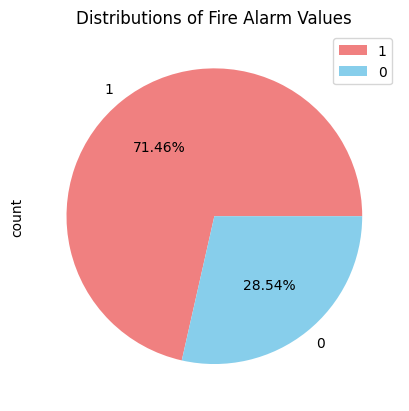

In [ ]:
#pokazanie ile jest wartosci 0 i 1 w kolumnie fire alarm
data.groupby(['Fire Alarm'])['Fire Alarm'].count() / len(data) * 100
color = ['lightcoral', 'skyblue']
data['Fire Alarm'].value_counts().plot.pie(colors = color, autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

# Wykresy

<Axes: xlabel='Temperature[C]', ylabel='Count'>

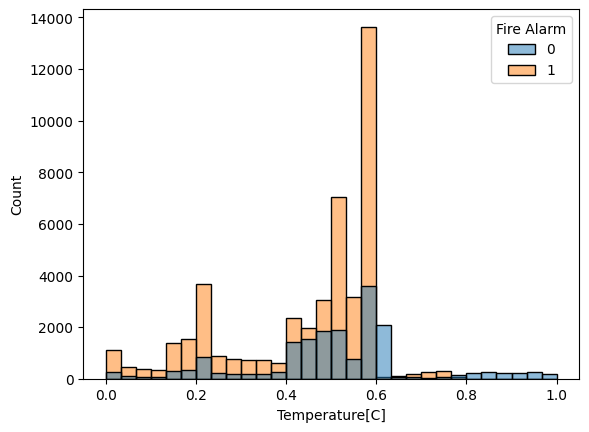

In [ ]:
sns.histplot(data=data,x=data['Temperature[C]'], bins=30, hue='Fire Alarm')

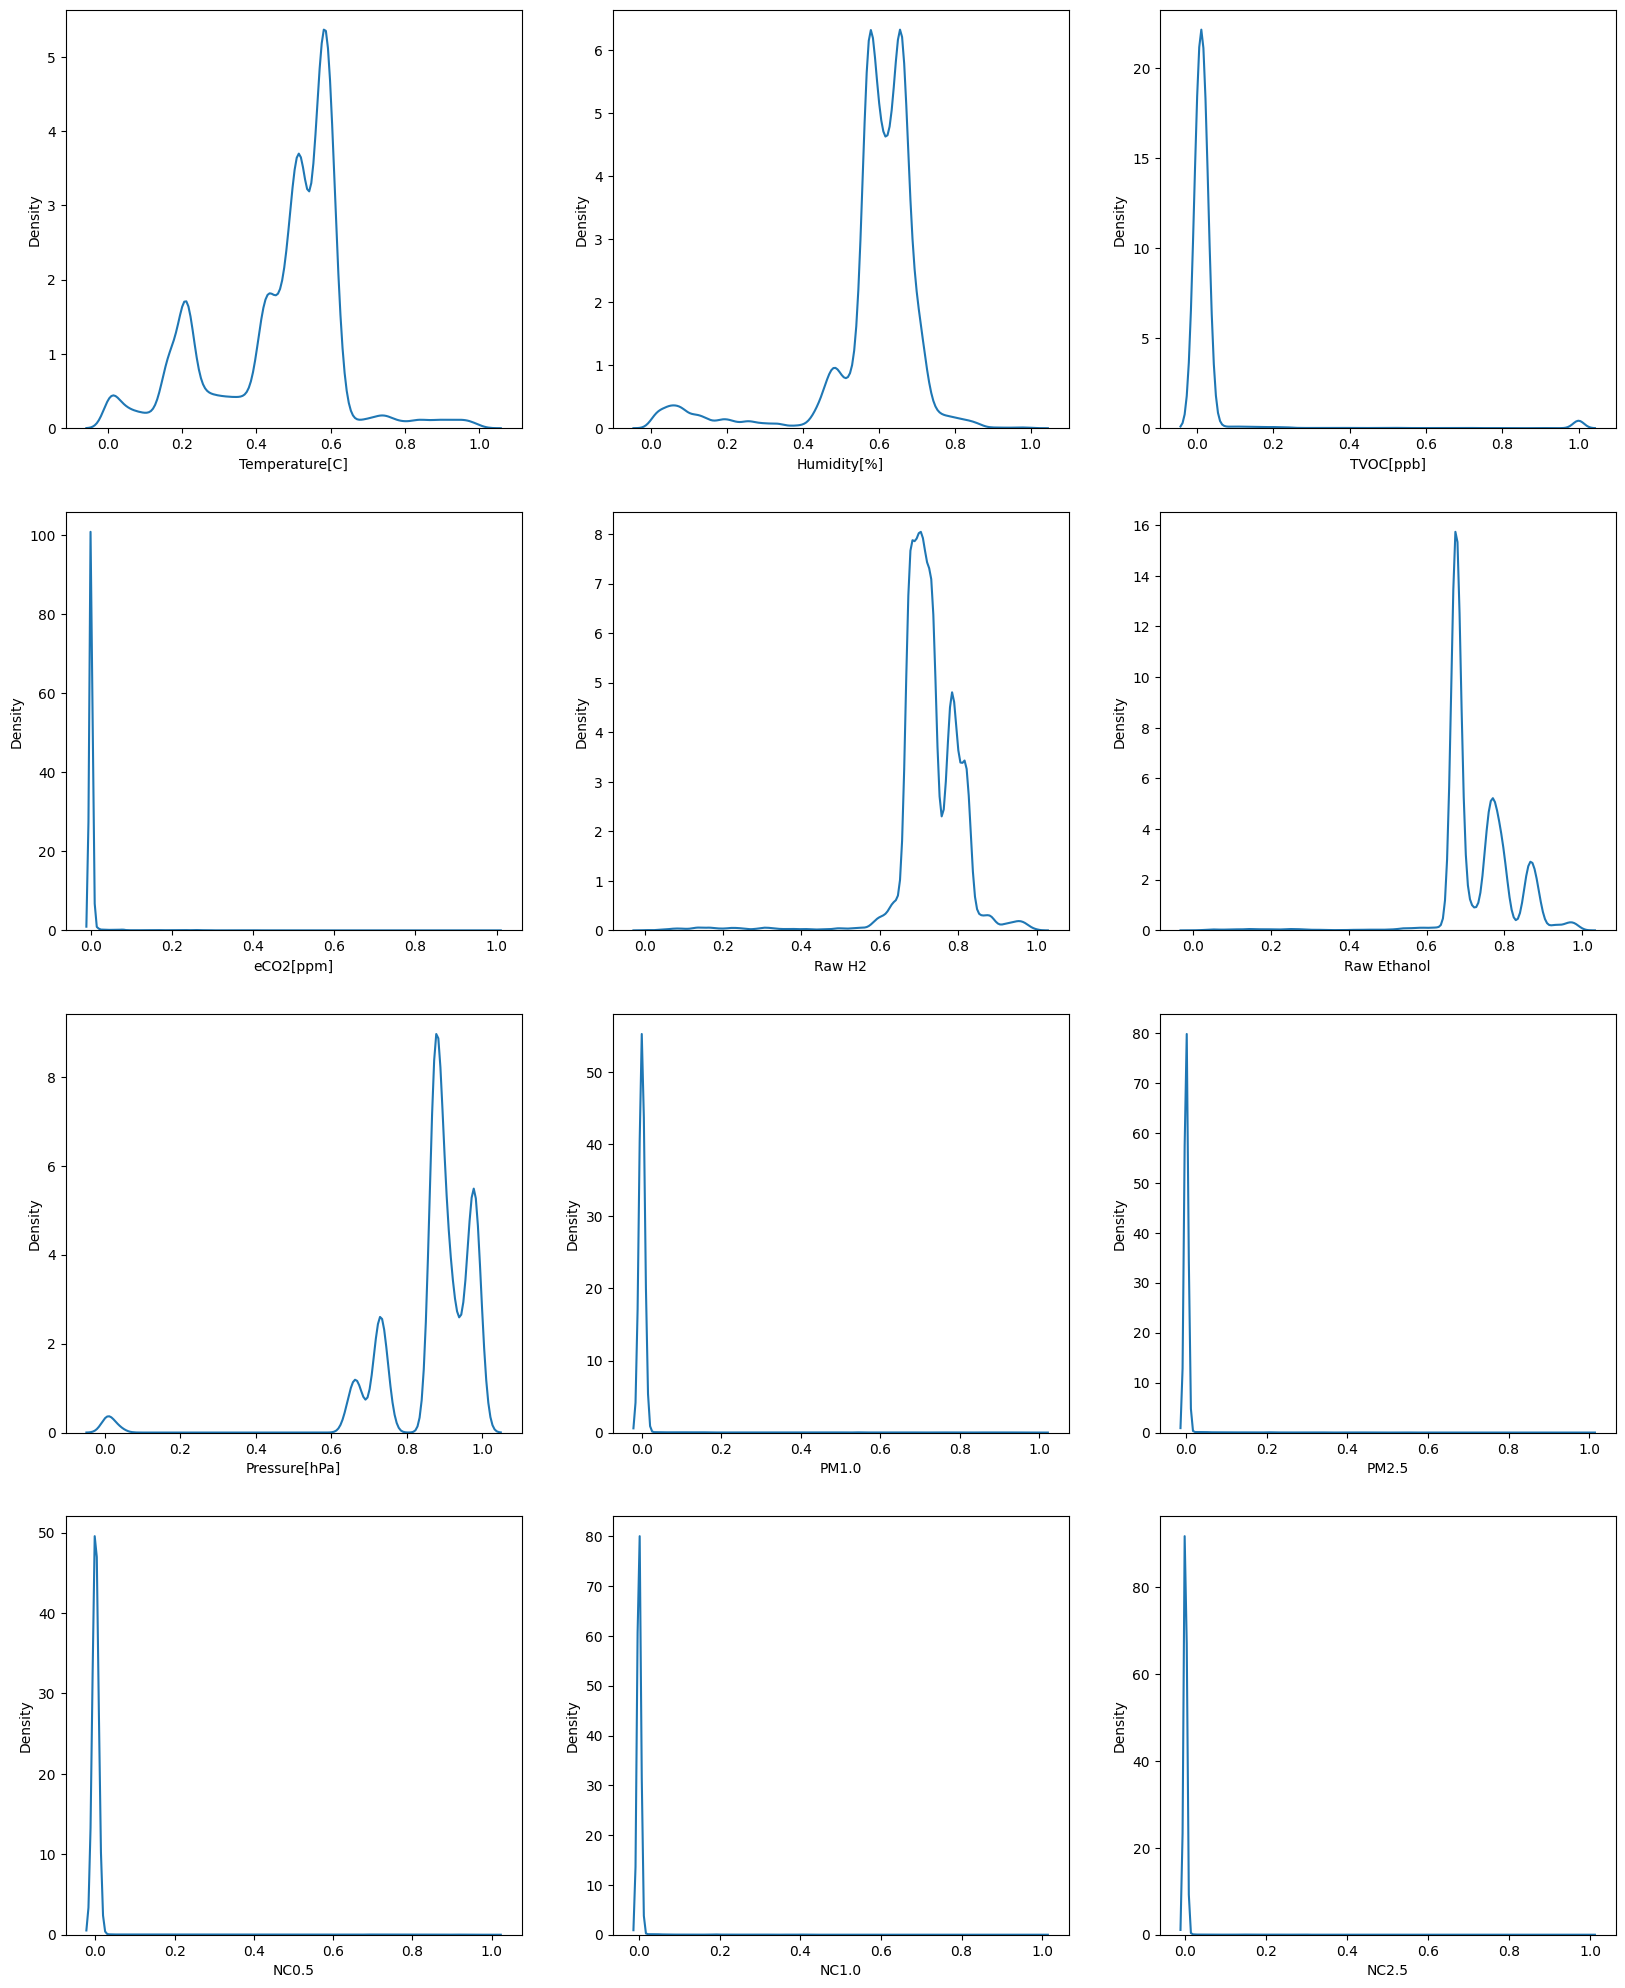

In [ ]:
#wykres pokazujacy rozklady wszystkich zmiennych
plt.figure(figsize=(20,25))
i=1
for col in data.drop('Fire Alarm',axis=1).columns:
    plt.subplot(4,3,i)
    sns.kdeplot(data[col])
    i+=1

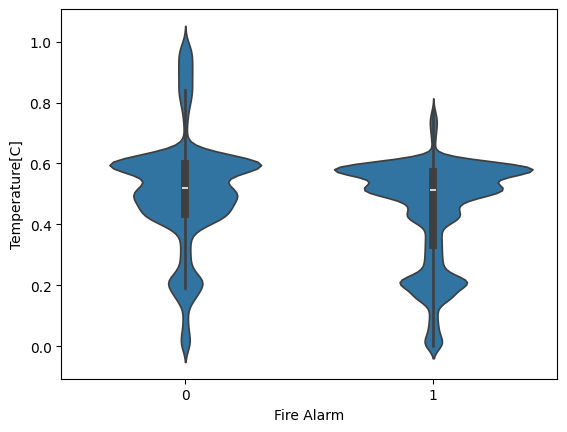

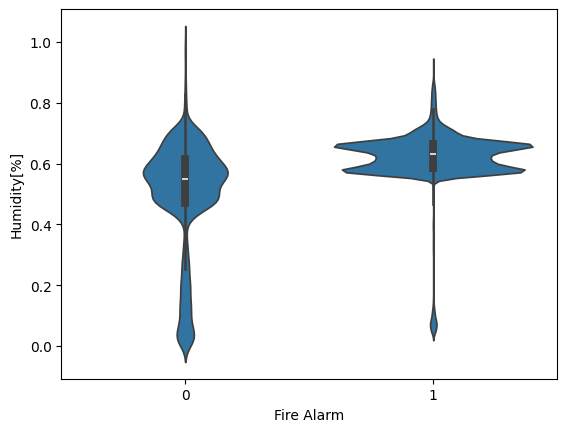

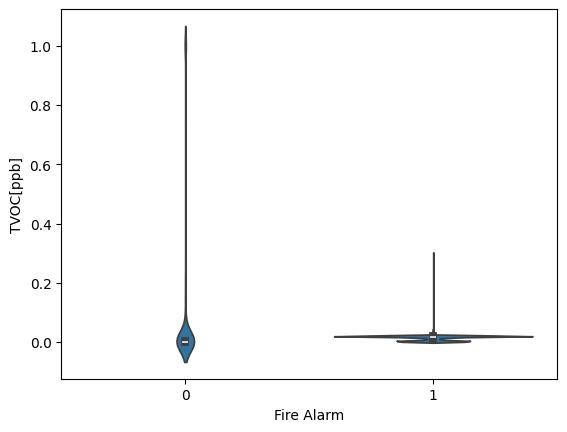

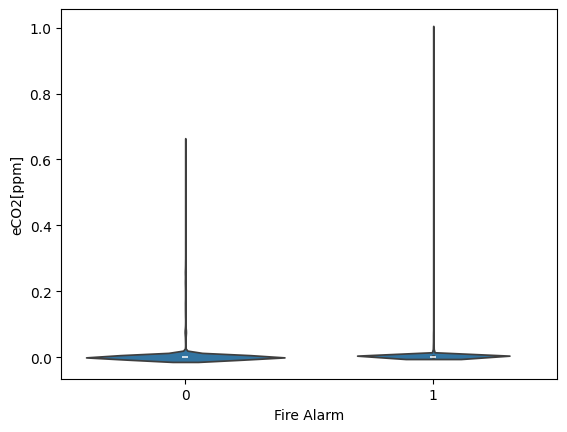

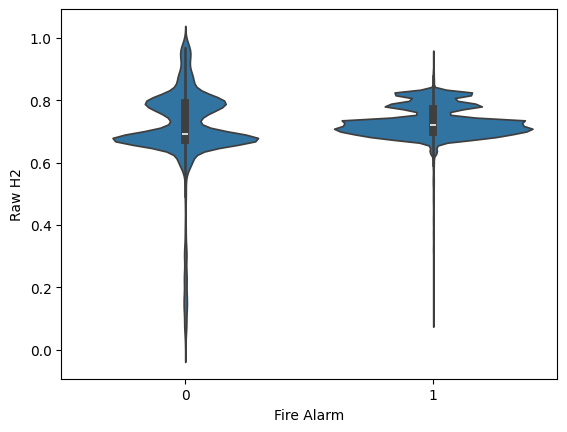

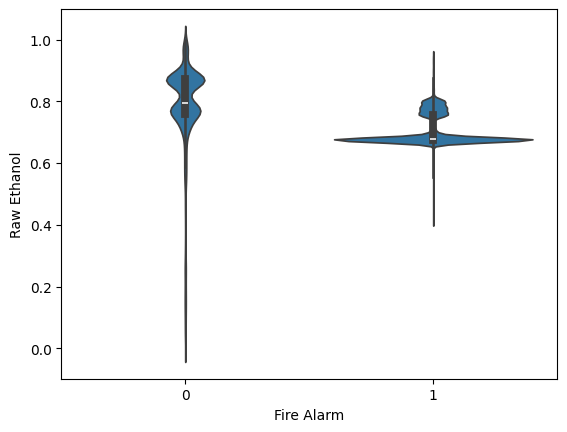

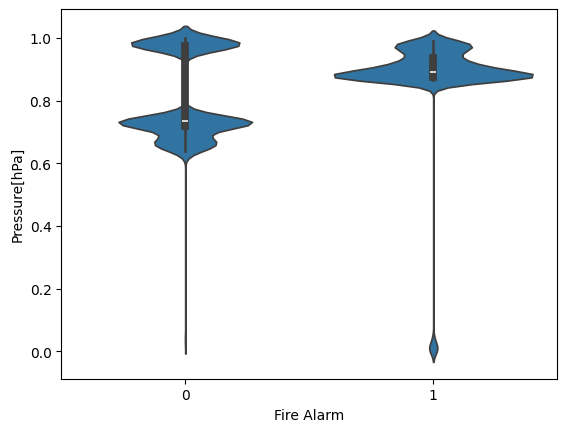

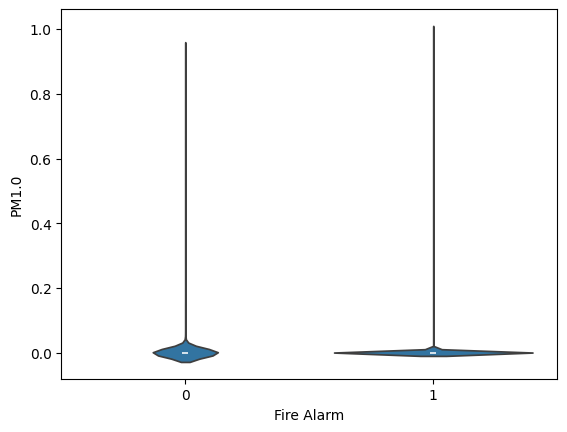

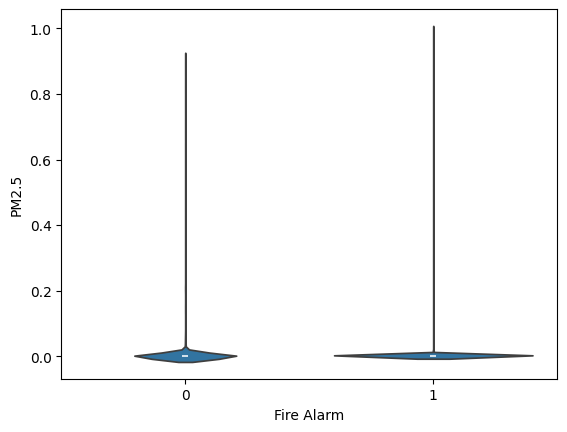

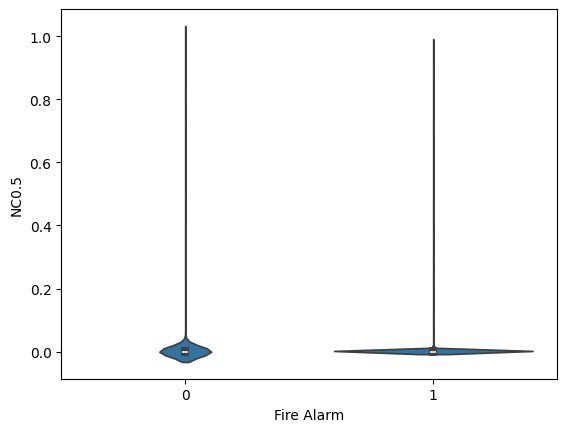

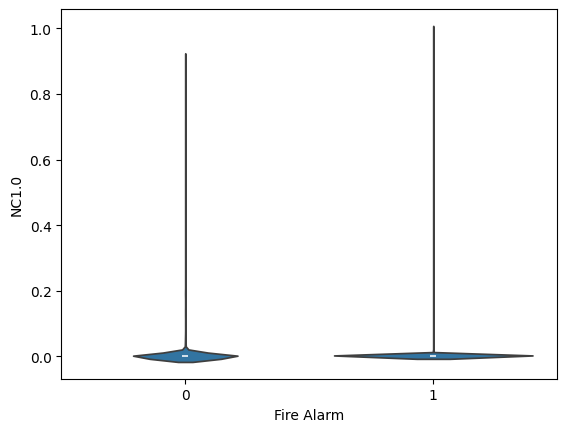

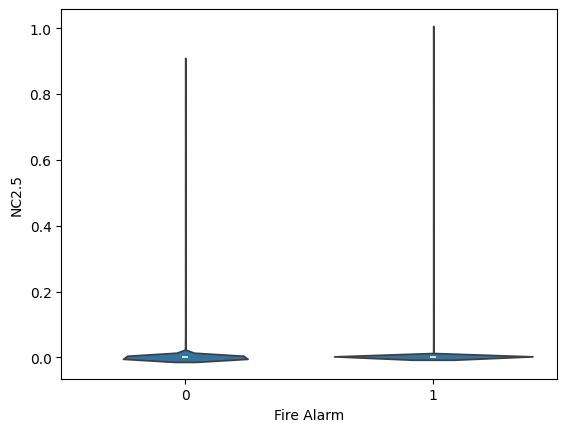

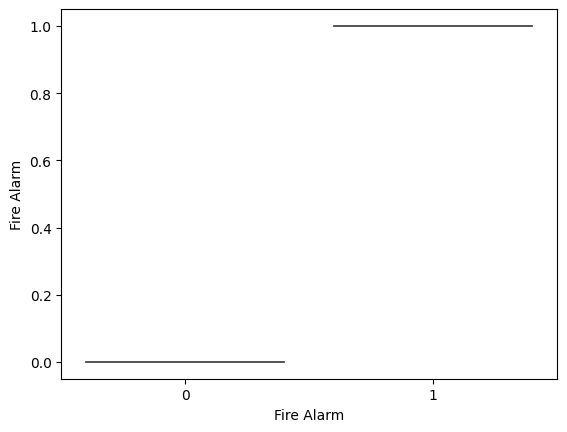

In [ ]:
#z tych wykresow mozemy zaobserwowac ze dla zmiennej air pressure(cisnienie powietrza) wartosci gdy
#wystepuje alarm roznia sie od wartosci gdy ten alarm nie wystepuje, moze to byc wazna zmienna
def violinplot(data):
    for x in data.columns:
        sns.violinplot(x='Fire Alarm',y=x,data=data)
        plt.show()
violinplot(data)

In [ ]:
#tabela korelacji
data.corr()

Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]    Raw H2  \
Temperature[C]        1.000000    -0.243986   0.082442   0.079265 -0.135540   
Humidity[%]          -0.243986     1.000000  -0.488878  -0.369095  0.247199   
TVOC[ppb]             0.082442    -0.488878   1.000000   0.606118 -0.653053   
eCO2[ppm]             0.079265    -0.369095   0.606118   1.000000 -0.682785   
Raw H2               -0.135540     0.247199  -0.653053  -0.682785  1.000000   
Raw Ethanol          -0.037343     0.068782  -0.673715  -0.506695  0.631495   
Pressure[hPa]        -0.251203     0.694614  -0.220004  -0.326043  0.303090   
PM1.0                 0.037330    -0.236538   0.597366   0.665482 -0.530714   
PM2.5                 0.032084    -0.178882   0.477424   0.572691 -0.431079   
NC0.5                 0.039291    -0.277389   0.670657   0.699604 -0.587769   
NC1.0                 0.031608    -0.174224   0.467386   0.564252 -0.422626   
NC2.5                 0.025526    -0.118502   0.344721   0.456323 -0.318518   
Fire Alarm           -0.163902     0.399846  -0.214743  -0.097006  0.107007   

                Raw Ethanol  Pressure[hPa]     PM1.0     PM2.5     NC0.5  \
Temperature[C]    -0.037343      -0.251203  0.037330  0.032084  0.039291   
Humidity[%]        0.068782       0.694614 -0.236538 -0.178882 -0.277389   
TVOC[ppb]         -0.673715      -0.220004  0.597366  0.477424  0.670657   
eCO2[ppm]         -0.506695      -0.326043  0.665482  0.572691  0.699604   
Raw H2             0.631495       0.303090 -0.530714 -0.431079 -0.587769   
Raw Ethanol        1.000000      -0.075926 -0.480698 -0.393192 -0.529186   
Pressure[hPa]     -0.075926       1.000000 -0.258938 -0.243071 -0.248657   
PM1.0             -0.480698      -0.258938  1.000000  0.956118  0.940045   
PM2.5             -0.393192      -0.243071  0.956118  1.000000  0.798873   
NC0.5             -0.529186      -0.248657  0.940045  0.798873  1.000000   
NC1.0             -0.385720      -0.241148  0.949860  0.999787  0.786274   
NC2.5             -0.293351      -0.213390  0.854901  0.969382  0.626711   
Fire Alarm        -0.340652       0.249797 -0.110552 -0.084916 -0.128118   

                   NC1.0     NC2.5  Fire Alarm  
Temperature[C]  0.031608  0.025526   -0.163902  
Humidity[%]    -0.174224 -0.118502    0.399846  
TVOC[ppb]       0.467386  0.344721   -0.214743  
eCO2[ppm]       0.564252  0.456323   -0.097006  
Raw H2         -0.422626 -0.318518    0.107007  
Raw Ethanol    -0.385720 -0.293351   -0.340652  
Pressure[hPa]  -0.241148 -0.213390    0.249797  
PM1.0           0.949860  0.854901   -0.110552  
PM2.5           0.999787  0.969382   -0.084916  
NC0.5           0.786274  0.626711   -0.128118  
NC1.0           1.000000  0.974249   -0.082828  
NC2.5           0.974249  1.000000   -0.057707  
Fire Alarm     -0.082828 -0.057707    1.000000

<Axes: >

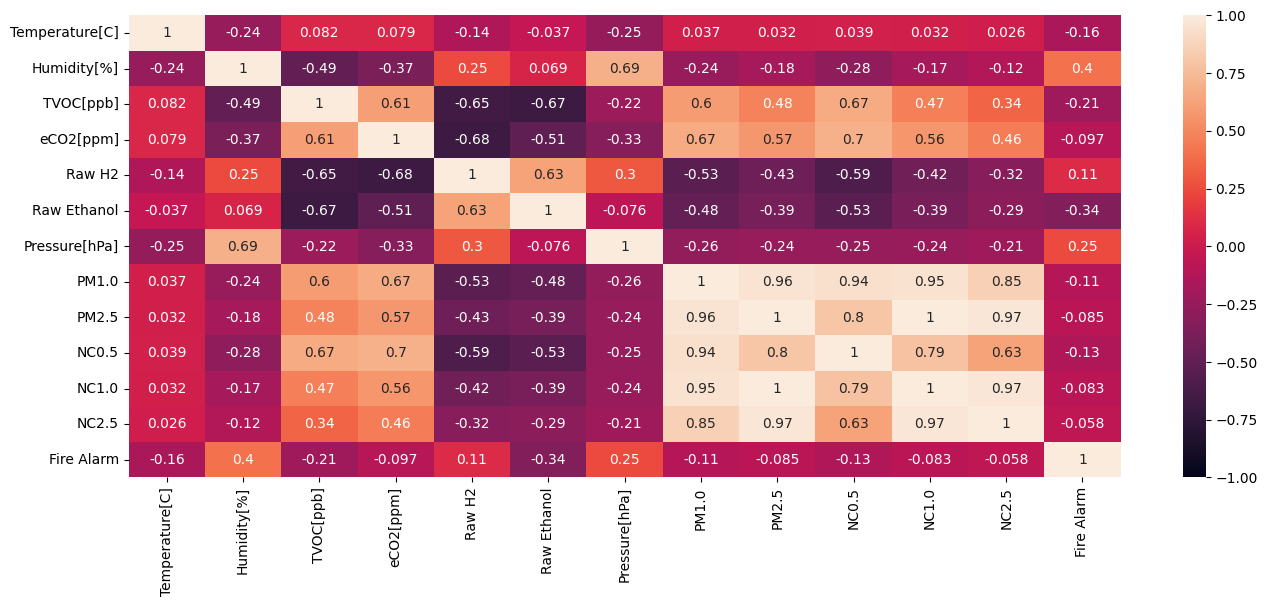

In [ ]:
#Wykres korelacji
plt.figure(figsize=(16,6))
sns.heatmap(data.corr(),vmin=-1,vmax=1,annot=True)

# Rzeczy z groupby

In [ ]:
#jak temperatura wplywa na to czy uruchomi sie alarm
#widzimy ze dla niskiej temperatury jest wieksza szansa ze alarm sie odpali
data.groupby(pd.cut(data['Temperature[C]'],[0,0.25,0.5,0.75,1]))['Fire Alarm'].sum()/data.groupby(pd.cut(data['Temperature[C]'],[0,0.25,0.5,0.75,1]))['Fire Alarm'].count()*100

Temperature[C]
(0.0, 0.25]    81.328200
(0.25, 0.5]    65.161647
(0.5, 0.75]    74.241968
(0.75, 1.0]    11.130742
Name: Fire Alarm, dtype: float64

In [ ]:
#Tak samo dla kolumny z wilgotnoscia widzimy ze gdy wilgotnosc jest duza to rowniez
#jest duza szansa ze czujnik sie wlaczy, co ma sens bo czesto czujniki
#reaguja np na pare wodna
data.groupby(pd.cut(data['Humidity[%]'],[0,0.25,0.5,0.75,1]))['Fire Alarm'].sum()/data.groupby(pd.cut(data['Humidity[%]'],[0,0.25,0.5,0.75,1]))['Fire Alarm'].count()*100

Humidity[%]
(0.0, 0.25]    25.417661
(0.25, 0.5]     3.969209
(0.5, 0.75]    79.297600
(0.75, 1.0]    81.803922
Name: Fire Alarm, dtype: float64

<Axes: xlabel='Temperature[C]', ylabel='Humidity[%]'>

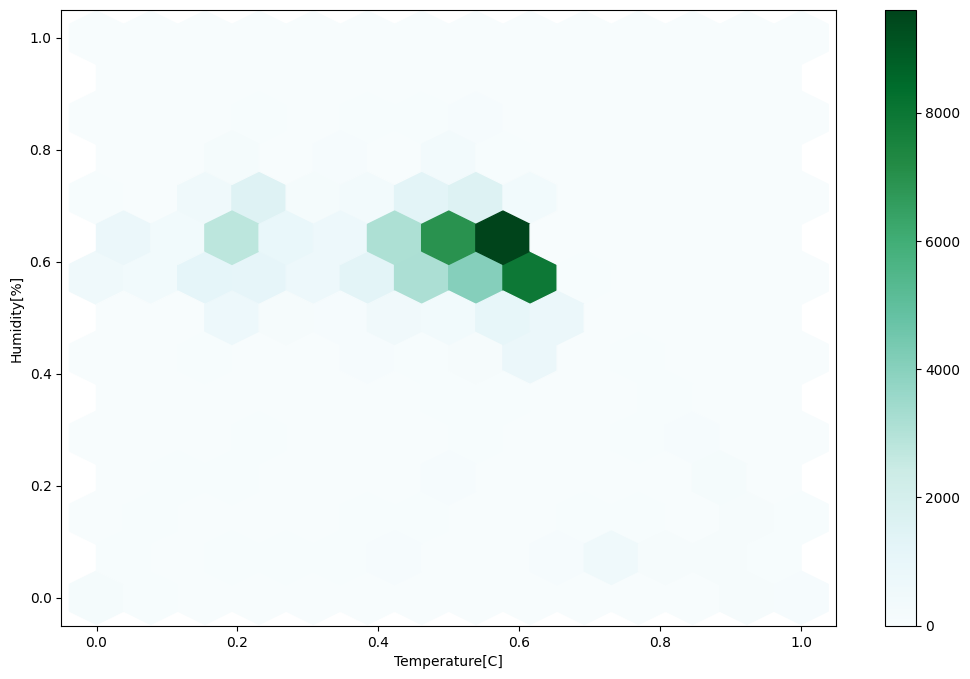

In [ ]:
#ten wykres pokazuje nam ze dane glownie zgromadzone sa kolo zakresow 0.5-0.7 w przypadku
#tych dwoch zmiennych
data.plot.hexbin(x='Temperature[C]',y = 'Humidity[%]',
               figsize = (12.5,8.0),gridsize = (13,7))

<Axes: xlabel='Fire Alarm'>

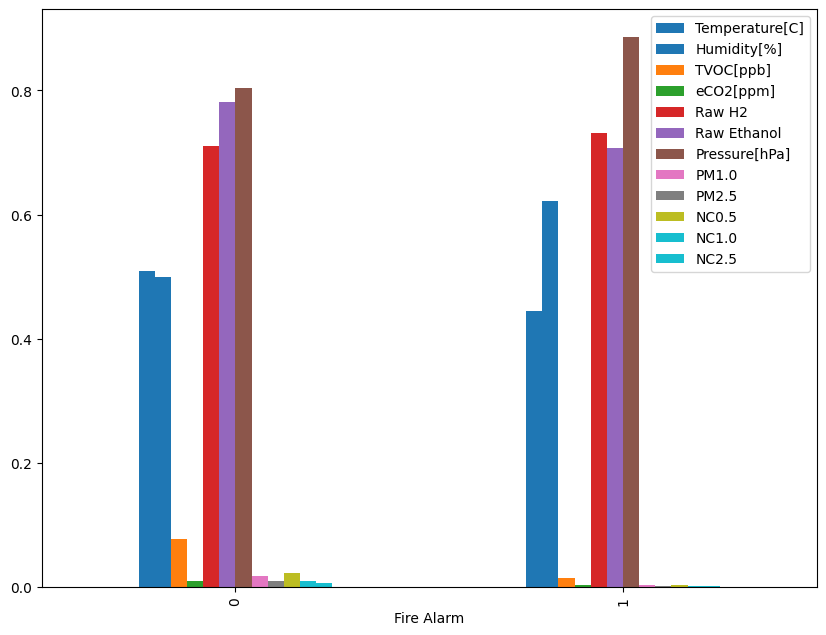

In [ ]:
#znaczna roznice widzimy w zmiennej TVOC i Humidity
data.groupby('Fire Alarm').mean().plot.bar(cmap = "tab10", figsize=(10.0,7.5))

# Regresja logistyczna bez pca

In [ ]:
#regresja logistyczna nie stosujac PCA
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)
#przetestowanie na zbiorze testowym
y_predicted = model.predict(X_test)
MSE = mean_squared_error(y_test,y_predicted)
MSE
#MSE oznacza sredni blad

0.21390374331550802

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_test,y_test,cv=3)
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.74      0.77      5547\n           1       0.77      0.83      0.80      5673\n\n    accuracy                           0.79     11220\n   macro avg       0.79      0.79      0.79     11220\nweighted avg       0.79      0.79      0.79     11220\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

78.6096256684492

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[4126, 1421],
       [ 979, 4694]])

In [ ]:
#stworzenie selektora do zostawienia okreslonych kolumn
selector = RFECV(model,step = 1, min_features_to_select = 1, cv = 10,scoring = "f1")
selector.fit(X_train,y_train)

RFECV(cv=10, estimator=LogisticRegression(max_iter=10000), scoring='f1')

In [ ]:
#zostawiamy tylko te kolumny ktore maja wartosc true
kolumny_t = pd.DataFrame({
    "selected": selector.support_,
    "ranking": selector.ranking_
}, index=X.columns)
data_t = kolumny_t[
    kolumny_t['selected'] == True
].index
X_t = X[data_t.tolist()]

In [ ]:
X_t_train, X_t_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)

In [ ]:
wartosci = y_test.value_counts()
null_accuracy = wartosci[1] / (wartosci[1] + wartosci[0])
null_accuracy
#null accuracy pokazuje skutecznosc losowego losowania etykiety
#biorac pod uwage ze nasz zbior testowy ma nie rowne rozlozenie wartosci etykiet

0.5056149732620321

In [ ]:
#stworzenie nowej regresji logistycznej dla zbioru z 4 cechami
model_t = LogisticRegression(max_iter = 10000)
model_t.fit(X_t_train,y_train)
#przetestowanie na zbiorze testowym
y_t_predicted = model_t.predict(X_t_test)
MSE = mean_squared_error(y_test,y_t_predicted)
MSE

0.1873440285204991

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_t_test,y_test,cv=3)
classification_report(y_test,y_t_predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81      5547\n           1       0.82      0.81      0.81      5673\n\n    accuracy                           0.81     11220\n   macro avg       0.81      0.81      0.81     11220\nweighted avg       0.81      0.81      0.81     11220\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_t_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

81.26559714795009

In [ ]:
#dla poprawionej regresji logistycznej z 4 kolumnami uzyskalismy accuracy na poziomie 81,2% co jest
#niewielka poprawa w porownaniu do 86.6%

# PCA 4 -> 3


In [ ]:
#dla 4 zmiennych sprobujemy pokazac dla pca 3 wymiarowego

In [ ]:
pca_3 = PCA(n_components=3)
pca_3.fit(X_t)
transformed_df_3 = pca_3.transform(X_t)

In [ ]:
fig = go.Figure(data=[go.Scatter3d(
    x=transformed_df_3[:, 0],
    y=transformed_df_3[:, 1],
    z=transformed_df_3[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=colors,  # Kolory na satisfaction
        colorscale='Viridis',          # Skala kolorów
        opacity=0.8
    )
)])

# Dodaj etykiety osi
fig.update_layout(scene=dict(
    xaxis_title='PCA 1',
    yaxis_title='PCA 2',
    zaxis_title='PCA 3'
))

# Wyświetl wykres interaktywny
fig.show()

In [ ]:
#pca do 2 wymiarow ze zbioru w ktorym zostaly 4 kolumny
#aby mozna bylo przedstawiac wyniki na wykresie
pca = PCA(n_components = 2)
X_2D = pca.fit_transform(X_t)

# KNN

In [ ]:
#Zrobienie knn dla wartosci od 2 do 10
for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'wartosci dla n = {i}')
  print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

  print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
# mozemy zaobserwowac najlepsze wyniki nieznacznie lecz dla n = 2 dlatego taki parametr
# wybiore dla modelu knn

wartosci dla n = 2
Training set score: 1.0000
Test set score: 0.9998
wartosci dla n = 3
Training set score: 0.9999
Test set score: 0.9998
wartosci dla n = 4
Training set score: 0.9998
Test set score: 0.9998
wartosci dla n = 5
Training set score: 0.9996
Test set score: 0.9998
wartosci dla n = 6
Training set score: 0.9995
Test set score: 0.9997
wartosci dla n = 7
Training set score: 0.9995
Test set score: 0.9996
wartosci dla n = 8
Training set score: 0.9995
Test set score: 0.9996
wartosci dla n = 9
Training set score: 0.9995
Test set score: 0.9996


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9998


# SVM

In [ ]:
#SVM
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.898 total time=  19.2s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.897 total time=  21.4s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.881 total time=  32.0s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.879 total time=  31.2s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.904 total time=  15.2s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.900 total time=  14.8s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.886 total time=  20.6s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.879 total time=  22.7s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.score(X_train,y_train)

0.9185691816405319

In [ ]:
grid.score(X_test,y_test)

0.9173601703115928

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

91.73601703115928

In [ ]:
#svm bez parametrow
svc=SVC()
svc.fit(X_train,y_train)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9174


In [ ]:
#svm z poly kernel i c = 1.0
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9141


In [ ]:
poly_svc100=SVC(kernel='poly', C=100.0)
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9476


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.6297


# Sieci Neuronowe

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_t_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
#early stop
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=10,  #stop jak nie w 10 Epochs
                   restore_best_weights=True)

In [ ]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=50,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/50
23/23 - 1s - loss: 0.6925 - accuracy: 0.5121 - val_loss: 0.6905 - val_accuracy: 0.4944 - 1s/epoch - 60ms/step
Epoch 2/50
23/23 - 0s - loss: 0.6889 - accuracy: 0.5294 - val_loss: 0.6863 - val_accuracy: 0.5490 - 120ms/epoch - 5ms/step
Epoch 3/50
23/23 - 0s - loss: 0.6839 - accuracy: 0.5427 - val_loss: 0.6771 - val_accuracy: 0.5400 - 163ms/epoch - 7ms/step
Epoch 4/50
23/23 - 0s - loss: 0.6724 - accuracy: 0.5824 - val_loss: 0.6493 - val_accuracy: 0.8161 - 123ms/epoch - 5ms/step
Epoch 5/50
23/23 - 0s - loss: 0.6507 - accuracy: 0.6302 - val_loss: 0.5979 - val_accuracy: 0.8161 - 115ms/epoch - 5ms/step
Epoch 6/50
23/23 - 0s - loss: 0.6062 - accuracy: 0.6985 - val_loss: 0.5240 - val_accuracy: 0.8161 - 115ms/epoch - 5ms/step
Epoch 7/50
23/23 - 0s - loss: 0.5367 - accuracy: 0.7642 - val_loss: 0.4602 - val_accuracy: 0.8174 - 118ms/epoch - 5ms/step
Epoch 8/50
23/23 - 0s - loss: 0.4813 - accuracy: 0.7883 - val_loss: 0.4250 - val_accuracy: 0.8175 - 130ms/epoch - 6ms/step
Epoch 9/50
23/23 -

In [ ]:
NN_Classifier.history

{'loss': [0.5272615551948547,
  0.2936871647834778,
  0.2046680897474289,
  0.16393862664699554,
  0.13333307206630707,
  0.12545056641101837,
  0.11262175440788269,
  0.10181209444999695,
  0.08732646703720093,
  0.09510505199432373,
  0.07935624569654465,
  0.09870465844869614,
  0.08759739995002747,
  0.07371112704277039,
  0.07066182047128677,
  0.06948480010032654,
  0.07721371948719025,
  0.06868552416563034,
  0.0662425309419632,
  0.06831223517656326,
  0.07194388657808304,
  0.054483965039253235,
  0.06606581062078476,
  0.05945549160242081,
  0.049802545458078384,
  0.08229037374258041,
  0.056535061448812485,
  0.07065215706825256,
  0.053527869284152985,
  0.05470642074942589,
  0.055480923503637314,
  0.053850095719099045,
  0.0462411567568779,
  0.07930702716112137,
  0.08145524561405182,
  0.08867970108985901,
  0.07605542987585068,
  0.09211750328540802,
  0.0683891773223877,
  0.07148156315088272,
  0.07696899771690369,
  0.07022608071565628,
  0.10755424946546555],
 '

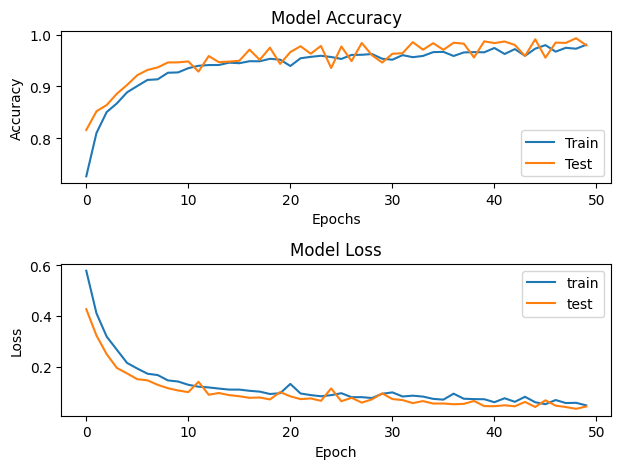

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

351/351 [==============================] - 1s 1ms/step
Accuracy Score:  95.56%
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5547
           1       0.95      0.97      0.96      5673

    accuracy                           0.96     11220
   macro avg       0.96      0.96      0.96     11220
weighted avg       0.96      0.96      0.96     11220



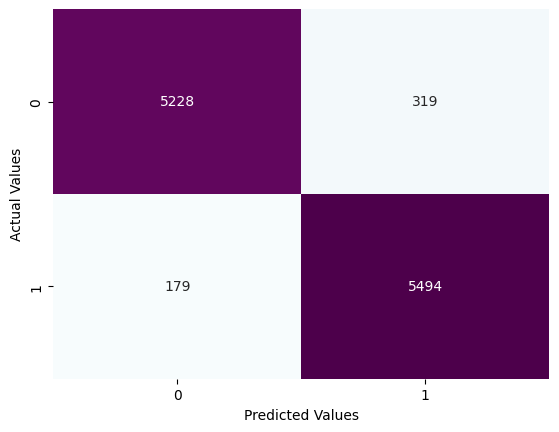

In [ ]:
y_pred=(model.predict(X_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# siec neuronowa z istotnymi cechami

In [ ]:
NN_Classifier = model.fit(X_t_train, y_train,
                          batch_size=1000,
                          epochs=200,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_t_test, y_test))

Epoch 1/200
23/23 - 1s - loss: 0.6966 - accuracy: 0.4863 - val_loss: 0.6926 - val_accuracy: 0.4944 - 1s/epoch - 62ms/step
Epoch 2/200
23/23 - 0s - loss: 0.6913 - accuracy: 0.4872 - val_loss: 0.6886 - val_accuracy: 0.4944 - 129ms/epoch - 6ms/step
Epoch 3/200
23/23 - 0s - loss: 0.6865 - accuracy: 0.5115 - val_loss: 0.6810 - val_accuracy: 0.4939 - 139ms/epoch - 6ms/step
Epoch 4/200
23/23 - 0s - loss: 0.6790 - accuracy: 0.5668 - val_loss: 0.6677 - val_accuracy: 0.8222 - 144ms/epoch - 6ms/step
Epoch 5/200
23/23 - 0s - loss: 0.6648 - accuracy: 0.6040 - val_loss: 0.6434 - val_accuracy: 0.8069 - 125ms/epoch - 5ms/step
Epoch 6/200
23/23 - 0s - loss: 0.6415 - accuracy: 0.6538 - val_loss: 0.6057 - val_accuracy: 0.7975 - 121ms/epoch - 5ms/step
Epoch 7/200
23/23 - 0s - loss: 0.6018 - accuracy: 0.7170 - val_loss: 0.5352 - val_accuracy: 0.7886 - 169ms/epoch - 7ms/step
Epoch 8/200
23/23 - 0s - loss: 0.5405 - accuracy: 0.7622 - val_loss: 0.4477 - val_accuracy: 0.7902 - 127ms/epoch - 6ms/step
Epoch 9/20

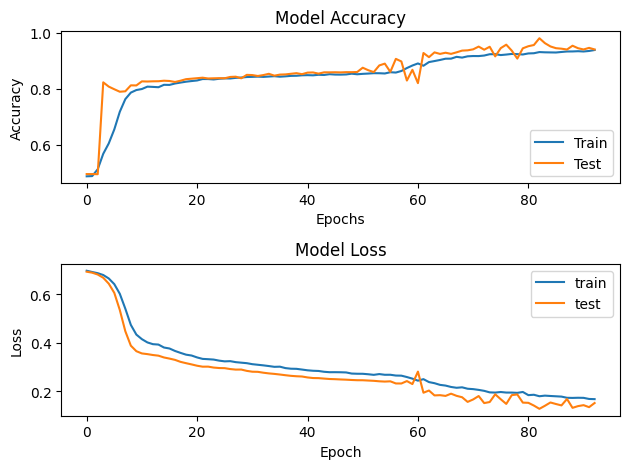

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

351/351 [==============================] - 1s 2ms/step
Accuracy Score:  97.98%
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5547
           1       0.97      0.99      0.98      5673

    accuracy                           0.98     11220
   macro avg       0.98      0.98      0.98     11220
weighted avg       0.98      0.98      0.98     11220



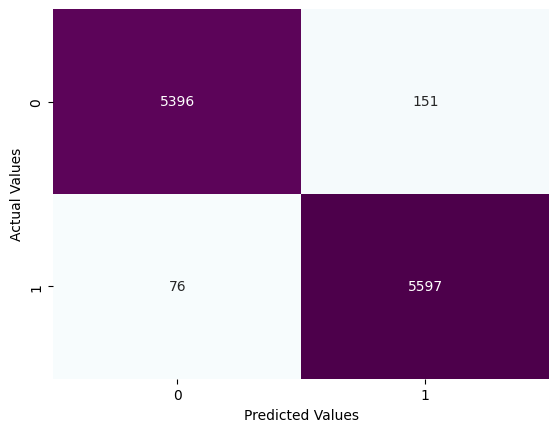

In [ ]:
y_pred=(model.predict(X_t_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# Nowy Zbior zeby liczba przypadkow byla rowna

In [ ]:
df2 = pd.concat([df[df['Fire Alarm'] == 1].sample(17000),df[df['Fire Alarm'] == 0].sample(17000)])

In [ ]:
df2.shape
#podzial zbioru na treningowe i testowe
X = df2.iloc[:,2:-1]
y = df2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Regresja dla zbioru 50/50

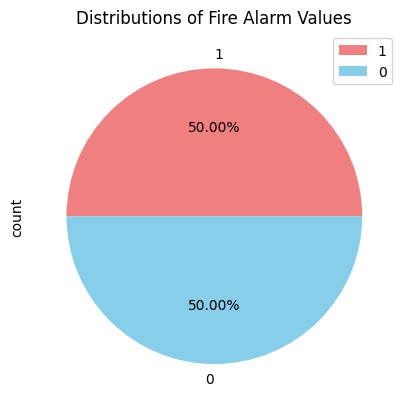

In [ ]:
#pokazanie ile jest wartosci 0 i 1 w kolumnie fire alarm
df2.groupby(['Fire Alarm'])['Fire Alarm'].count() / len(df2) * 100
color = ['lightcoral', 'skyblue']
df2['Fire Alarm'].value_counts().plot.pie(colors = color, autopct = "%.2f%%")
plt.title("Distributions of Fire Alarm Values")
plt.legend()
plt.show()

In [ ]:
#regresja logistyczna nie stosujac PCA
model = LogisticRegression(max_iter = 10000)
model.fit(X_train,y_train)
#przetestowanie na zbiorze testowym
y_predicted = model.predict(X_test)
MSE = mean_squared_error(y_test,y_predicted)
MSE
#MSE oznacza sredni blad

0.21390374331550802

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_test,y_test,cv=3)
classification_report(y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.74      0.77      5547\n           1       0.77      0.83      0.80      5673\n\n    accuracy                           0.79     11220\n   macro avg       0.79      0.79      0.79     11220\nweighted avg       0.79      0.79      0.79     11220\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

78.6096256684492

In [ ]:
confusion_matrix(y_test,y_predicted)

array([[4126, 1421],
       [ 979, 4694]])

In [ ]:
#stworzenie selektora do zostawienia okreslonych kolumn
selector = RFECV(model,step = 1, min_features_to_select = 1, cv = 10,scoring = "f1")
selector.fit(X_train,y_train)

RFECV(cv=10, estimator=LogisticRegression(max_iter=10000), scoring='f1')

In [ ]:
#zostawiamy tylko te kolumny ktore maja wartosc true
kolumny_t = pd.DataFrame({
    "selected": selector.support_,
    "ranking": selector.ranking_
}, index=X.columns)
data_t = kolumny_t[
    kolumny_t['selected'] == True
].index
X_t = X[data_t.tolist()]

In [ ]:
kolumny_t
#zostaly nam 2 kolumny

selected  ranking
TVOC[ppb]          True        1
eCO2[ppm]         False        3
Raw H2            False        2
Raw Ethanol        True        1
Pressure[hPa]     False        4
PM1.0             False        6
PM2.5             False        7
NC0.5             False        5
NC1.0             False        8
NC2.5             False        9

In [ ]:
X_t_train, X_t_test, y_train, y_test = train_test_split(X_t, y, test_size=0.33, random_state=42)

In [ ]:
wartosci = y_test.value_counts()
null_accuracy = wartosci[1] / (wartosci[1] + wartosci[0])
null_accuracy
#null accuracy pokazuje skutecznosc losowego losowania etykiety
#biorac pod uwage ze nasz zbior testowy ma nie rowne rozlozenie wartosci etykiet

0.5056149732620321

In [ ]:
#stworzenie nowej regresji logistycznej dla zbioru z 4 cechami
model_t = LogisticRegression(max_iter = 10000)
model_t.fit(X_t_train,y_train)
#przetestowanie na zbiorze testowym
y_t_predicted = model_t.predict(X_t_test)
MSE = mean_squared_error(y_test,y_t_predicted)
MSE

0.1873440285204991

In [ ]:
#wyniki modelu
val = cross_val_score(model,X_t_test,y_test,cv=3)
classification_report(y_test,y_t_predicted)

'              precision    recall  f1-score   support\n\n           0       0.81      0.81      0.81      5547\n           1       0.82      0.81      0.81      5673\n\n    accuracy                           0.81     11220\n   macro avg       0.81      0.81      0.81     11220\nweighted avg       0.81      0.81      0.81     11220\n'

In [ ]:
#Macierz pomylek i nasze accuracy
matrix = confusion_matrix(y_test,y_t_predicted)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100
#nastapila poprawa skutecznosci i przy okazji zmniejszylismy liczbe kolumn

81.26559714795009

# knn dla 50/50

In [ ]:
#Zrobienie knn dla wartosci od 2 do 10
for i in range(2,10):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  print(f'wartosci dla n = {i}')
  print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

  print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))
# mozemy zaobserwowac najlepsze wyniki nieznacznie lecz dla n = 2 dlatego taki parametr
# wybiore dla modelu knn

wartosci dla n = 2
Training set score: 0.9998
Test set score: 0.9995
wartosci dla n = 3
Training set score: 0.9996
Test set score: 0.9989
wartosci dla n = 4
Training set score: 0.9994
Test set score: 0.9988
wartosci dla n = 5
Training set score: 0.9994
Test set score: 0.9988
wartosci dla n = 6
Training set score: 0.9989
Test set score: 0.9988
wartosci dla n = 7
Training set score: 0.9991
Test set score: 0.9988
wartosci dla n = 8
Training set score: 0.9989
Test set score: 0.9988
wartosci dla n = 9
Training set score: 0.9990
Test set score: 0.9987


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

Training set score: 0.9998
Test set score: 0.9995


# svm dla 50/50

In [ ]:
#SVM
param_grid = {'C': [0.1, 1],
              'gamma': [1, 0.1],
              'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv = 2)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.825 total time=  13.7s
[CV 2/2] END ........C=0.1, gamma=1, kernel=rbf;, score=0.814 total time=   9.4s
[CV 1/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.816 total time=  15.3s
[CV 2/2] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.805 total time=  14.5s
[CV 1/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.863 total time=   5.8s
[CV 2/2] END ..........C=1, gamma=1, kernel=rbf;, score=0.864 total time=   8.2s
[CV 1/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.796 total time=   7.9s
[CV 2/2] END ........C=1, gamma=0.1, kernel=rbf;, score=0.794 total time=   9.2s


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1], 'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.score(X_train,y_train)

0.8628182616330115

In [ ]:
grid.score(X_test,y_test)

0.8614081996434938

In [ ]:
y_pred = grid.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
(matrix[1][1] + matrix[0][0]) / (matrix[0][0] + matrix[0][1] + matrix[1][0] + matrix[1][1]) * 100

86.14081996434938

In [ ]:
#svm bez parametrow
svc=SVC()
svc.fit(X_train,y_train)
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8614


In [ ]:
#svm z poly kernel i c = 1.0
poly_svc=SVC(kernel='poly', C=1.0)
poly_svc.fit(X_train,y_train)
y_pred=poly_svc.predict(X_test)
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.8627


In [ ]:
poly_svc100=SVC(kernel='poly', C=100.0)
# fit classifier to training set
poly_svc100.fit(X_train, y_train)
# make predictions on test set
y_pred=poly_svc100.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9221


In [ ]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0)
# fit classifier to training set
sigmoid_svc.fit(X_train,y_train)
# make predictions on test set
y_pred=sigmoid_svc.predict(X_test)
# compute and print accuracy score
print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with sigmoid kernel and C=1.0 : 0.5786


# Sieci dla 50/50

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
es = EarlyStopping(monitor='val_accuracy',
                   mode='max',
                   patience=20,  #S 10 Epochs
                   restore_best_weights=True)

In [ ]:
NN_Classifier = model.fit(X_train, y_train,
                          batch_size=1000,
                          epochs=50,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test, y_test))

Epoch 1/50
23/23 - 4s - loss: 0.5735 - accuracy: 0.7444 - val_loss: 0.4181 - val_accuracy: 0.8160 - 4s/epoch - 158ms/step
Epoch 2/50
23/23 - 2s - loss: 0.4113 - accuracy: 0.8095 - val_loss: 0.3124 - val_accuracy: 0.8466 - 2s/epoch - 106ms/step
Epoch 3/50
23/23 - 2s - loss: 0.3185 - accuracy: 0.8468 - val_loss: 0.2327 - val_accuracy: 0.8669 - 2s/epoch - 87ms/step
Epoch 4/50
23/23 - 1s - loss: 0.2514 - accuracy: 0.8715 - val_loss: 0.2096 - val_accuracy: 0.8757 - 1s/epoch - 55ms/step
Epoch 5/50
23/23 - 1s - loss: 0.2137 - accuracy: 0.8867 - val_loss: 0.1779 - val_accuracy: 0.8937 - 1s/epoch - 51ms/step
Epoch 6/50
23/23 - 2s - loss: 0.1934 - accuracy: 0.8978 - val_loss: 0.1618 - val_accuracy: 0.9106 - 2s/epoch - 71ms/step
Epoch 7/50
23/23 - 2s - loss: 0.1742 - accuracy: 0.9089 - val_loss: 0.1485 - val_accuracy: 0.9164 - 2s/epoch - 74ms/step
Epoch 8/50
23/23 - 1s - loss: 0.1872 - accuracy: 0.9042 - val_loss: 0.1884 - val_accuracy: 0.8995 - 1s/epoch - 51ms/step
Epoch 9/50
23/23 - 1s - loss: 

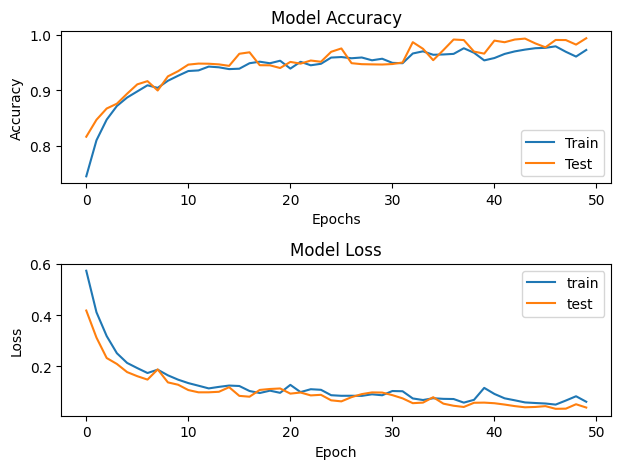

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

351/351 [==============================] - 1s 3ms/step
Accuracy Score:  99.39%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5547
           1       1.00      0.99      0.99      5673

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



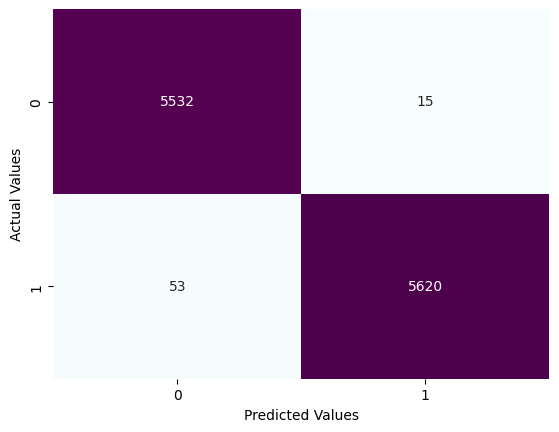

In [ ]:
y_pred=(model.predict(X_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

# sieci cechy istotne dla 50.50 dla X_t_train

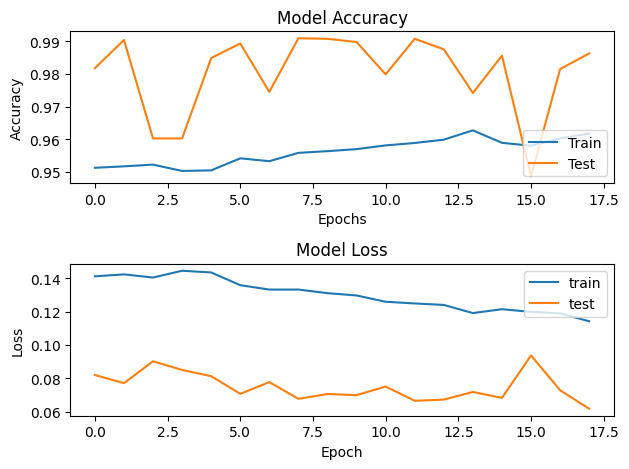

In [ ]:
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [ ]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_t_test.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
NN_Classifier = model.fit(X_t_train, y_train,
                          batch_size=1000,
                          epochs=400,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_t_test, y_test))

Epoch 1/400
23/23 - 1s - loss: 0.6911 - accuracy: 0.5180 - val_loss: 0.6893 - val_accuracy: 0.4944 - 1s/epoch - 59ms/step
Epoch 2/400
23/23 - 0s - loss: 0.6858 - accuracy: 0.5428 - val_loss: 0.6817 - val_accuracy: 0.4943 - 120ms/epoch - 5ms/step
Epoch 3/400
23/23 - 0s - loss: 0.6756 - accuracy: 0.5834 - val_loss: 0.6626 - val_accuracy: 0.8378 - 111ms/epoch - 5ms/step
Epoch 4/400
23/23 - 0s - loss: 0.6557 - accuracy: 0.6477 - val_loss: 0.6199 - val_accuracy: 0.7892 - 112ms/epoch - 5ms/step
Epoch 5/400
23/23 - 0s - loss: 0.6149 - accuracy: 0.7097 - val_loss: 0.5592 - val_accuracy: 0.7850 - 106ms/epoch - 5ms/step
Epoch 6/400
23/23 - 0s - loss: 0.5531 - accuracy: 0.7607 - val_loss: 0.4717 - val_accuracy: 0.8217 - 111ms/epoch - 5ms/step
Epoch 7/400
23/23 - 0s - loss: 0.4795 - accuracy: 0.7942 - val_loss: 0.4048 - val_accuracy: 0.7955 - 113ms/epoch - 5ms/step
Epoch 8/400
23/23 - 0s - loss: 0.4309 - accuracy: 0.8020 - val_loss: 0.3654 - val_accuracy: 0.8193 - 112ms/epoch - 5ms/step
Epoch 9/40

351/351 [==============================] - 1s 1ms/step
Accuracy Score:  99.15%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5547
           1       1.00      0.99      0.99      5673

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



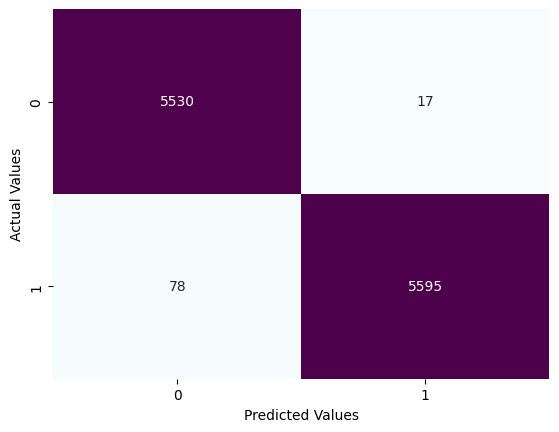

In [ ]:
y_pred=(model.predict(X_t_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5530,   17],
       [  78, 5595]])

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_t_train.shape[1],)))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [ ]:
NN_Classifier = model.fit(X_t_train, y_train,
                          batch_size=1000,
                          epochs=400,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_t_test, y_test))

Epoch 1/400
23/23 - 1s - loss: 0.6885 - accuracy: 0.5228 - val_loss: 0.6795 - val_accuracy: 0.8247 - 1s/epoch - 63ms/step
Epoch 2/400
23/23 - 0s - loss: 0.6722 - accuracy: 0.5999 - val_loss: 0.6491 - val_accuracy: 0.8211 - 144ms/epoch - 6ms/step
Epoch 3/400
23/23 - 0s - loss: 0.6356 - accuracy: 0.6779 - val_loss: 0.5838 - val_accuracy: 0.8140 - 141ms/epoch - 6ms/step
Epoch 4/400
23/23 - 0s - loss: 0.5657 - accuracy: 0.7551 - val_loss: 0.4718 - val_accuracy: 0.8135 - 143ms/epoch - 6ms/step
Epoch 5/400
23/23 - 0s - loss: 0.4665 - accuracy: 0.7989 - val_loss: 0.3737 - val_accuracy: 0.8265 - 185ms/epoch - 8ms/step
Epoch 6/400
23/23 - 0s - loss: 0.4136 - accuracy: 0.8009 - val_loss: 0.3481 - val_accuracy: 0.8038 - 188ms/epoch - 8ms/step
Epoch 7/400
23/23 - 0s - loss: 0.3886 - accuracy: 0.8097 - val_loss: 0.3315 - val_accuracy: 0.8328 - 185ms/epoch - 8ms/step
Epoch 8/400
23/23 - 0s - loss: 0.3785 - accuracy: 0.8083 - val_loss: 0.3273 - val_accuracy: 0.8332 - 195ms/epoch - 8ms/step
Epoch 9/40

712/712 [==============================] - 1s 2ms/step
Accuracy Score:  99.01%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     11453
           1       1.00      0.98      0.99     11327

    accuracy                           0.99     22780
   macro avg       0.99      0.99      0.99     22780
weighted avg       0.99      0.99      0.99     22780



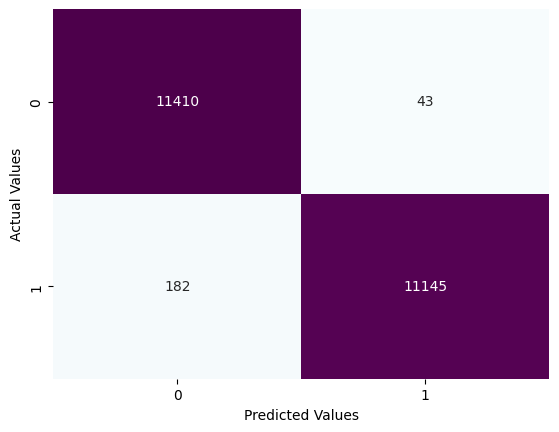

In [ ]:
y_pred=(model.predict(X_t_train) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_train, y_pred)*100))
print(classification_report(y_train, y_pred))
sns.heatmap(confusion_matrix(y_train, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

351/351 [==============================] - 1s 4ms/step
Accuracy Score:  99.19%
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5547
           1       1.00      0.99      0.99      5673

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



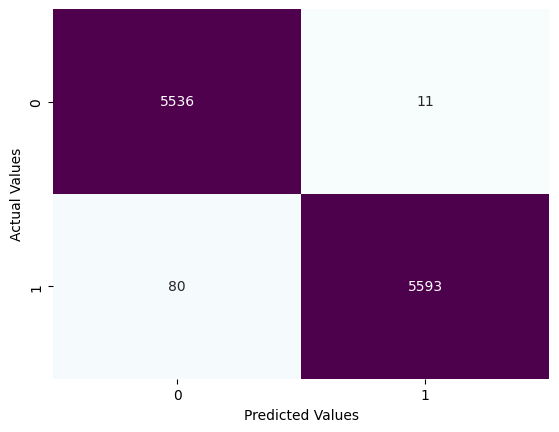

In [ ]:
y_pred=(model.predict(X_t_test) > 0.5).astype(int)
print('Accuracy Score: ', '{:.2f}%'.format(accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='BuPu')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [ ]:
confusion_matrix(y_train,y_pred)

array([[11410,    43],
       [  182, 11145]])

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5536,   11],
       [  80, 5593]])